# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [143]:
#Import your libraries

import numpy as np
import pandas as pd
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

In this lab, we will use two datasets. Both datasets contain variables that describe apps from the Google Play Store. We will use our knowledge in feature extraction to process these datasets and prepare them for the use of a ML algorithm.

# Challenge 1 - Loading and Extracting Features from the First Dataset

#### In this challenge, our goals are: 

* Exploring the dataset.
* Identify the columns with missing values.
* Either replacing the missing values in each column or drop the columns.
* Conver each column to the appropriate type.

#### The first dataset contains different information describing the apps. 

Load the dataset into the variable `google_play` in the cell below. The dataset is in the file `googleplaystore.csv`

In [2]:
# Your code here:

google_play = pd.read_csv('../googleplaystore.csv')

#### Examine all variables and their types in the following cell

In [3]:
# Your code here:
display(google_play.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Since this dataset only contains one numeric column, let's skip the `describe()` function and look at the first 5 rows using the `head()` function

In [4]:
# Your code here:
display(google_play.head())
print(len(google_play))
print(len(google_play['App'].unique()))

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


10841
9660


#### We can see that there are a few columns that could be coerced to numeric.

Start with the reviews column. We can evaluate what value is causing this column to be of object type finding the non-numeric values in this column. To do this, we recall the `to_numeric()` function. With this function, we are able to coerce all non-numeric data to null. We can then use the `isnull()` function to subset our dataframe using the True/False column that this function generates.

In the cell below, transform the Reviews column to numeric and assign this new column to the variable `Reviews_numeric`. Make sure to coerce the errors.

In [5]:
# Your code here:
google_play['Reviews_numeric']=pd.to_numeric(google_play['Reviews'],errors='coerce')

Next, create a column containing True/False values using the `isnull()` function. Assign this column to the `Reviews_isnull` variable.

In [6]:
# Your code here:
Reviews_isnull=google_play['Reviews_numeric'].isna()

Finally, subset the `google_play` with `Reviews_isnull`. This should give you all the rows that contain non-numeric characters.

Your output should look like:

![Reviews_bool.png](reviews-bool.png)

In [7]:
# Your code here:
google_play['Review_isnull']=Reviews_isnull
display(google_play.head())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_numeric,Review_isnull
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,159.0,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,967.0,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,87510.0,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,215644.0,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,967.0,False


#### We see that Google Play is using a shorthand for millions. 

Let's write a function to transform this data.

Steps:

1. Create a function that returns the correct numeric values of *Reviews*.
1. Define a test string with `M` in the last character.
1. Test your function with the test string. Make sure your function works correctly. If not, modify your functions and test again.

In [8]:
# Your code here

def convert_string_to_numeric(s):
    """
    Convert a string value to numeric. If the last character of the string is `M`, obtain the 
    numeric part of the string, multiply it with 1,000,000, then return the result. Otherwise, 
    convert the string to numeric value and return the result.
    
    Args:
        s: The Reviews score in string format.

    Returns:
        The correct numeric value of the Reviews score.
    """
    if 'M' in str(s):
        return float(s[:-1])*1000000
    else:
        return float(s)

test_string = '4.0M'

convert_string_to_numeric(test_string) == 4000000

True

The last step is to apply the function to the `Reviews` column in the following cell:

In [9]:
# Your code here:
google_play['Reviews']=google_play['Reviews'].apply(convert_string_to_numeric);

Check the non-numeric `Reviews` row again. It should have been fixed now and you should see:

![Reviews_bool_fixed.png](reviews-bool-fixed.png)

In [10]:
# Your code here
display(pd.DataFrame(google_play.loc[10472]).T)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_numeric,Review_isnull
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19,3e+06,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,NaN,True


Also check the variable types of `google_play`. The `Reviews` column should be a `float64` type now.

In [11]:
# Your code here:
google_play.dtypes

App                 object
Category            object
Rating             float64
Reviews            float64
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Reviews_numeric    float64
Review_isnull         bool
dtype: object

#### The next column we will look at is `Size`. We start by looking at all unique values in `Size`:

*Hint: use `unique()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html))*.

In [12]:
# Your code here:
google_play['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

You should have seen lots of unique values of the app sizes.

#### While we can convert most of the `Size` values to numeric in the same way we converted the `Reviews` values, there is one value that is impossible to convert.

What is that badass value? Enter it in the next cell and calculate the proportion of its occurence to the total number of records of `google_play`.

In [13]:
# Your code here:
BADASS='Varies with device'

print(round(sum(google_play['Size']==BADASS)*100/len(google_play),2),'% of BADASS value in Size Feature')

15.64 % of BADASS value in Size Feature


#### While this column may be useful for other types of analysis, we opt to drop it from our dataset. 

There are two reasons. First, the majority of the data are ordinal but a sizeable proportion are missing because we cannot convert them to numerical values. Ordinal data are both numerical and categorical, and they usually can be ranked (e.g. 82k is smaller than 91M). In contrast, non-ordinal categorical data such as blood type and eye color cannot be ranked. The second reason is as a categorical column, it has too many unique values to produce meaningful insights. Therefore, in our case the simplest strategy would be to drop the column.

Drop the column in the cell below (use `inplace=True`)

In [14]:
# Your code here:
google_play.drop('Size',axis=1,inplace=True)

#### Now let's look at how many missing values are in each column. 

This will give us an idea of whether we should come up with a missing data strategy or give up on the column all together. In the next column, find the number of missing values in each column: 

*Hint: use the `isna()` and `sum()` functions.*

In [15]:
# Your code here:
google_play.isna().sum()

App                   0
Category              0
Rating             1474
Reviews               0
Installs              0
Type                  1
Price                 0
Content Rating        1
Genres                0
Last Updated          0
Current Ver           8
Android Ver           3
Reviews_numeric       1
Review_isnull         0
dtype: int64

You should find the column with the most missing values is now `Rating`.

#### What is the proportion of the missing values in `Rating` to the total number of records?

Enter your answer in the cell below.

In [16]:
# Your code here:
print(round(google_play['Rating'].isna().sum()*100/len(google_play),2),'% of missing values for Rating Feature')

13.6 % of missing values for Rating Feature


A sizeable proportion of the `Rating` column is missing. A few other columns also contain several missing values.

#### We opt to preserve these columns and remove the rows containing missing data.

In particular, we don't want to drop the `Rating` column because:

* It is one of the most important columns in our dataset. 

* Since the dataset is not a time series, the loss of these rows will not have a negative impact on our ability to analyze the data. It will, however, cause us to lose some meaningful observations. But the loss is limited compared to the gain we receive by preserving these columns.

In the cell below, remove all rows containing at least one missing value. Use the `dropna()` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)). Assign the new dataframe to the variable `google_missing_removed`.

In [17]:
# Your code here:
google_missing_removed=google_play.dropna(axis=0)

In [18]:
print(len(google_play),'registers for google_play DF')
print(len(google_missing_removed),' registers for google_missing_removed DF')
print(round((len(google_play)-len(google_missing_removed))*100/len(google_play),2),'% of difference')

10841 registers for google_play DF
9360  registers for google_missing_removed DF
13.66 % of difference


From now on, we use the `google_missing_removed` variable instead of `google_play`.

#### Next, we look at the `Last Updated` column.

The `Last Updated` column seems to contain a date, though it is classified as an object type. Let's convert this column using the `pd.to_datetime` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)).

In [19]:
# Your code here:
times=pd.to_datetime(google_missing_removed['Last Updated'])
google_missing_removed['Last Updated']=times

/home/ivan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### The last column we will transform is `Price`. 

We start by looking at the unique values of this column.

In [20]:
# Your code here:
google_missing_removed['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

Since all prices are ordinal data without exceptions, we can tranform this column by removing the dollar sign and converting to numeric. We can create a new column called `Price Numerical` and drop the original column.

We will achieve our goal in three steps. Follow the instructions of each step below.

#### First we remove the dollar sign. Do this in the next cell by applying the `str.replace` function to the column to replace `$` with an empty string (`''`).

In [21]:
# Your code here:
google_missing_removed['Price']=google_missing_removed['Price'].str.replace('$','')

/home/ivan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
google_missing_removed['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

#### Second step, coerce the `Price Numerical` column to numeric.

In [23]:
# Your code here:
a=google_missing_removed.loc[:,'Price'].apply(convert_string_to_numeric)
google_missing_removed['Price_numerical']=a

/home/ivan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
google_missing_removed['Price_numerical'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

**Finally, drop the original `Price` column.**

In [25]:
# Your code here:
google_missing_removed.drop(['Price','Review_isnull','Reviews_numeric'],inplace=True,axis=1)

/home/ivan/.local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Now check the variable types of `google_missing_removed`. Make sure:

* `Size` and `Price` columns have been removed.
* `Rating`, `Reviews`, and `Price Numerical` have the type of `float64`.
* `Last Updated` has the type of `datetime64`.

In [26]:
# Your code here
print('Size feature in DF? ','Size' in google_missing_removed.columns.tolist())
print('')
print('Price feature in DF? ','Price' in google_missing_removed.columns.tolist())
print('')
display(google_missing_removed.dtypes)

Size feature in DF?  False

Price feature in DF?  False



App                        object
Category                   object
Rating                    float64
Reviews                   float64
Installs                   object
Type                       object
Content Rating             object
Genres                     object
Last Updated       datetime64[ns]
Current Ver                object
Android Ver                object
Price_numerical           float64
dtype: object

# Challenge 2 - Loading and Extracting Features from the Second Dataset

Load the second dataset to the variable `google_reviews`. The data is in the file `googleplaystore_user_reviews.csv`.

In [27]:
# Your code here:

google_review = pd.read_csv('../googleplaystore_user_reviews.csv')

#### This dataset contains the top 100 reviews for each app. 

Let's examine this dataset using the `head` function

In [28]:
# Your code here
display(google_review.head())

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


#### The main piece of information we would like to extract from this dataset is the proportion of positive reviews of each app. 

Columns like `Sentiment_Polarity` and `Sentiment_Subjectivity` are not to our interests because we have no clue how to use them. We do not care about `Translated_Review` because natural language processing is too complex for us at present (in fact the `Sentiment`, `Sentiment_Polarity`, and `Sentiment_Subjectivity` columns are derived from `Translated_Review` the data scientists). 

What we care about in this challenge is `Sentiment`. To be more precise, we care about **what is the proportion of *Positive* sentiment of each app**. This will require us to aggregate the `Sentiment` data by `App` in order to calculate the proportions.

Now that you are clear about what we are trying to achieve, follow the steps below that will walk you through towards our goal.

#### Our first step will be to remove all rows with missing sentiment. 

In the next cell, drop all rows with missing data using the `dropna()` function and assign this new dataframe to `review_missing_removed`.

In [29]:
# Your code here:
google_review=google_review.dropna(subset=['Sentiment'],axis=0)

#### Now, use the `value_counts()` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)) to get a sense on how many apps are in this dataset and their review counts.

In [30]:
# Your code here:
print('App Feature:')
display(google_review['App'].value_counts())
print('')
print('Sentiment Feature:')
display(google_review['Sentiment'].value_counts())
print('')

App Feature:


Bowmasters                                            312
Angry Birds Classic                                   273
Helix Jump                                            273
Calorie Counter - MyFitnessPal                        255
Duolingo: Learn Languages Free                        240
Candy Crush Saga                                      240
Garena Free Fire                                      222
8 Ball Pool                                           219
Calorie Counter - Macros                              200
10 Best Foods for You                                 194
CBS Sports App - Scores, News, Stats & Watch Live     192
Google Photos                                         191
Alto's Adventure                                      175
8fit Workouts & Meal Planner                          171
DRAGON BALL LEGENDS                                   167
Candy Crush Soda Saga                                 166
Clash Royale                                          165
Adobe Acrobat 


Sentiment Feature:


Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

#### Now the tough part comes. Let's plan how we will achieve our goal:

1. We will count the number of reviews that contain *Positive* in the `Sentiment` column.

1. We will create a new dataframe to contain the `App` name, the number of positive reviews, and the total number of reviews of each app.

1. We will then loop the new dataframe to calculate the postivie review portion of each app.

#### Step 1: Count the number of positive reviews.

In the following cell, write a function that takes a column and returns the number of times *Positive* appears in the column. 

*Hint: One option is to use the `np.where()` function ([documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html)).*

In [31]:
# Your code below

def positive_function(x):
    """
    Count how many times the string `Positive` appears in a column (exact string match).
    
    Args:
        x: data column
    
    Returns:
        The number of occurrences of `Positive` in the column data.
    """
    return sum(np.where(x=='Positive',1,0))

#### Step 2: Create a new dataframe to contain the `App` name, the number of positive reviews, and the total number of reviews of each app

We will group `review_missing_removed` by the `App` column, then aggregate the grouped dataframe on the number of positive reviews and the total review counts of each app. The result will be assigned to a new variable `google_agg`. Here is the ([documentation on how to achieve it](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)). Take a moment or two to read the documentation and google examples because it is pretty complex.

When you obtain `google_agg`, check its values to make sure it has an `App` column as its index as well as a `Positive` column and a `Total` column. Your output should look like:

![Positive Reviews Agg](positive-review-agg.png)

*Hint: Use `positive_function` you created earlier as part of the param passed to the `agg()` function in order to aggregate the number of positive reviews.*

#### Bonus:

As of Pandas v0.23.4, you may opt to supply an array or an object to `agg()`. If you use the array param, you'll need to rename the columns so that their names are `Positive` and `Total`. Using the object param will allow you to create the aggregated columns with the desirable names without renaming them. However, you will probably encounter a warning indicating supplying an object to `agg()` will become outdated. It's up to you which way you will use. Try both ways out. Any way is fine as long as it works.

In [32]:
# Your code here:
apps=google_review['App'].unique().tolist()
print(len(apps))
pos_and_total=[]

for app_name in apps:
    df_temp=google_review[google_review['App']==app_name]
    pos_and_total.append([positive_function(df_temp['Sentiment']),len(df_temp)])

865


In [33]:
google_agg=pd.DataFrame(pos_and_total,columns=['Positive','Total'],index=apps)
google_agg.index.name='App'

Print the first 5 rows of `google_agg` to check it.

In [34]:
# Your code here
display(google_agg.head())

,Positive,Total
App,,
10 Best Foods for You,162,194
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,31,40
11st,23,40
1800 Contacts - Lens Store,64,80
1LINE – One Line with One Touch,27,38


#### Add a derived column to `google_agg` that is the ratio of the `Positive` and the `Total` columns. Call this column `Positive Ratio`. 

Make sure to account for the case where the denominator is zero using the `np.where()` function.

In [35]:
# Your code here:
pos_ratio=np.where(google_agg['Total']==0,np.nan,google_agg['Positive']/google_agg['Total'])
print('How many NaN values are in the calculater Positive Ratio? ',np.sum(np.isnan(pos_ratio)))

google_agg['Positive Ratio']=pos_ratio

How many NaN values are in the calculater Positive Ratio?  0


#### Now drop the `Positive` and `Total` columns. Do this with `inplace=True`.

In [36]:
# Your code here:
google_agg.drop(labels=['Positive','Total'],axis=1,inplace=True)

Print the first 5 rows of `google_agg`. Your output should look like:

![Positive Reviews Agg](positive-review-ratio.png)

In [37]:
# Your code here:
display(google_agg.head())

,Positive Ratio
App,
10 Best Foods for You,0.835052
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.775000
11st,0.575000
1800 Contacts - Lens Store,0.800000
1LINE – One Line with One Touch,0.710526


# Challenge 3 - Join the Dataframes

In this part of the lab, we will join the two dataframes and obtain a dataframe that contains features we can use in our ML algorithm.

In the next cell, join the `google_missing_removed` dataframe with the `google_agg` dataframe on the `App` column. Assign this dataframe to the variable `google`.

In [38]:
# Your code here:
google=pd.merge(google_missing_removed,google_agg,on='App')

#### Let's look at the final result using the `head()` function. Your final product should look like:

![Final Product](google-final-head.png)

In [39]:
# Your code here:
display(google.head())

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_numerical,Positive Ratio
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0.0,0.590909
1,Coloring book moana,FAMILY,3.9,974.0,"500,000+",Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0.0,0.590909
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,"1,000,000+",Free,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,0.0,0.711111
3,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216.0,"5,000,000+",Free,Everyone,Art & Design,2018-08-03,2.2.5,4.0.3 and up,0.0,1.000000
4,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654.0,"100,000+",Free,Everyone,Art & Design,2018-03-20,1.1,4.0.3 and up,0.0,0.605263


___

## BONUS BONUS: Train a SVM SVC

Import the necessary modules

In [40]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import svm

In [41]:
google.dtypes

App                        object
Category                   object
Rating                    float64
Reviews                   float64
Installs                   object
Type                       object
Content Rating             object
Genres                     object
Last Updated       datetime64[ns]
Current Ver                object
Android Ver                object
Price_numerical           float64
Positive Ratio            float64
dtype: object

Seems that we have 5 numerical features. Now we have to take the one we want to predict

I want to predict Belive I can predict the positive ratio of an app. I will convert from object to numerical
Installs Feature. Also I have to convert Type to 1 categorical column, Free

In [42]:
# First I create a copy of google DF to work
google_temp_temp=pd.merge(google_missing_removed,google_agg,on='App',how='left')
google_work_temp=google_temp_temp.copy()
print('Number of registers: ',len(google_work_temp))
display(google_work_temp.head(3))

Number of registers:  9360


,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_numerical,Positive Ratio
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,"10,000+",Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0.0,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0.0,0.590909
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,"5,000,000+",Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0.0,NaN


In [43]:
# Installs_numerical
list_num_ins=[]
for item in google_work_temp['Installs']:
    if '+' in item:
        list_num_ins.append(int(item.split('+')[0].replace(',','')))
    else:
        list_num_ins.append(int(item.replace(',','')))

In [44]:
google_work_temp['Installs_numerical']=list_num_ins

In [45]:
# Now drop Installs feature
google_work_temp.drop(columns=['Installs'],axis=1,inplace=True)

In [46]:
# Now lets categorize the Type feature to Free or not Free (1 or 0)
types_unique=['Free']

for item in types_unique:
    google_work_temp[item]=0

for item in types_unique:
    google_work_temp.loc[google_work_temp['Type'].str.contains(item),item]=1

In [47]:
display(google_work_temp.dtypes)

App                           object
Category                      object
Rating                       float64
Reviews                      float64
Type                          object
Content Rating                object
Genres                        object
Last Updated          datetime64[ns]
Current Ver                   object
Android Ver                   object
Price_numerical              float64
Positive Ratio               float64
Installs_numerical             int64
Free                           int64
dtype: object

In [48]:
display(google_work_temp.head(3))

,App,Category,Rating,Reviews,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_numerical,Positive Ratio,Installs_numerical,Free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0.0,NaN,10000,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0.0,0.590909,500000,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0.0,NaN,5000000,1


In [49]:
google_work_to_predict=google_work_temp[google_work_temp['Positive Ratio'].isna()]
google_work_to_train=google_work_temp[~google_work_temp['Positive Ratio'].isna()].reset_index(drop=True)

In [50]:
# lets change possitive ratio from numerical to categorical feature
for i in range(len(google_work_to_train)):
    cat=google_work_to_train['Positive Ratio'][i]
    if cat>0.75:
        google_work_to_train.loc[i,'Positive Ratio cat']=3
    elif cat<=0.75 and cat>0.5:
        google_work_to_train.loc[i,'Positive Ratio cat']=2
    elif cat<=0.5 and cat>0.25:
        google_work_to_train.loc[i,'Positive Ratio cat']=1
    else:
        google_work_to_train.loc[i,'Positive Ratio cat']=0
        
google_work_to_train.drop('Positive Ratio',axis=1,inplace=True)
google_work_to_predict.drop('Positive Ratio',axis=1,inplace=True)
google_work_to_predict['Positive Ratio cat']=np.nan

/home/ivan/.local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/ivan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [51]:
print('Registers without Positive Ratio: ',len(google_work_to_predict))
print('Registers to train the SVM: ',len(google_work_to_train))

Registers without Positive Ratio:  8132
Registers to train the SVM:  1228


In [52]:
google_work_to_train.describe()

,Rating,Reviews,Price_numerical,Installs_numerical,Free,Positive Ratio cat
count,1228.000000,1.228000e+03,1228.000000,1.228000e+03,1228.000000,1228.000000
mean,4.298697,1.322120e+06,0.093526,4.649488e+07,0.987785,2.053746
std,0.300689,4.937886e+06,1.146008,1.500214e+08,0.109889,0.732555
min,2.600000,4.600000e+01,0.000000,1.000000e+03,0.000000,0.000000
25%,4.200000,1.263275e+04,0.000000,1.000000e+06,1.000000,2.000000
50%,4.300000,6.619400e+04,0.000000,5.000000e+06,1.000000,2.000000
75%,4.500000,5.063545e+05,0.000000,1.000000e+07,1.000000,3.000000
max,4.900000,7.815831e+07,29.990000,1.000000e+09,1.000000,3.000000


In [53]:
print('Number of apps with Review: ',len(np.unique(google_review['App'])))

Number of apps with Review:  865


In [54]:
len(np.unique(google_work_to_train['App']))+len(np.unique(google_work_to_predict['App']))

8190

In [55]:
len(np.unique(google_work_to_predict['App']))

7374

In [56]:
len(np.unique(google_work_temp['App']))

8190

In [57]:
google_work_to_train.isna().sum()

App                   0
Category              0
Rating                0
Reviews               0
Type                  0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           0
Android Ver           0
Price_numerical       0
Installs_numerical    0
Free                  0
Positive Ratio cat    0
dtype: int64

In [58]:
google_work_to_predict.isna().sum()

App                      0
Category                 0
Rating                   0
Reviews                  0
Type                     0
Content Rating           0
Genres                   0
Last Updated             0
Current Ver              0
Android Ver              0
Price_numerical          0
Installs_numerical       0
Free                     0
Positive Ratio cat    8132
dtype: int64

In [59]:
google_work_to_train.corr()

,Rating,Reviews,Price_numerical,Installs_numerical,Free,Positive Ratio cat
Rating,1.000000,0.119560,-0.008638,0.017998,-0.005415,0.275596
Reviews,0.119560,1.000000,-0.021728,0.426118,0.029242,-0.126966
Price_numerical,-0.008638,-0.021728,1.000000,-0.025259,-0.734187,0.039567
Installs_numerical,0.017998,0.426118,-0.025259,1.000000,0.034255,-0.052323
Free,-0.005415,0.029242,-0.734187,0.034255,1.000000,-0.062707
Positive Ratio cat,0.275596,-0.126966,0.039567,-0.052323,-0.062707,1.000000


In [60]:
X=google_work_to_train[['Rating','Reviews','Installs_numerical','Free']]
y=google_work_to_train['Positive Ratio cat']

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
list(map(lambda x: len(x),[X_train,X_test,y_train,y_test]))

[982, 246, 982, 246]

In [116]:
listed_coefs=[]
for C in range(1,11):
    for gamma in np.arange(0.00005,0.0005,0.00001):
        clf=svm.SVC(C=C,gamma=gamma)
        clf.fit(X_train,y_train);
        score=clf.score(X_test,y_test)
        listed_coefs.append([C,gamma,score])

In [117]:
matrix=np.asarray(listed_coefs)
matrix[matrix[:,2]==max(matrix[:,2])]

array([[1.00000000e+00, 3.20000000e-04, 6.95121951e-01],
       [1.00000000e+00, 3.30000000e-04, 6.95121951e-01],
       [1.00000000e+00, 3.40000000e-04, 6.95121951e-01],
       [1.00000000e+00, 3.50000000e-04, 6.95121951e-01],
       [1.00000000e+00, 3.60000000e-04, 6.95121951e-01],
       [2.00000000e+00, 3.90000000e-04, 6.95121951e-01],
       [2.00000000e+00, 4.00000000e-04, 6.95121951e-01],
       [2.00000000e+00, 4.10000000e-04, 6.95121951e-01],
       [3.00000000e+00, 2.80000000e-04, 6.95121951e-01],
       [3.00000000e+00, 2.90000000e-04, 6.95121951e-01],
       [4.00000000e+00, 2.40000000e-04, 6.95121951e-01],
       [4.00000000e+00, 2.50000000e-04, 6.95121951e-01],
       [5.00000000e+00, 2.20000000e-04, 6.95121951e-01],
       [6.00000000e+00, 1.80000000e-04, 6.95121951e-01],
       [6.00000000e+00, 1.90000000e-04, 6.95121951e-01],
       [7.00000000e+00, 1.60000000e-04, 6.95121951e-01],
       [7.00000000e+00, 1.70000000e-04, 6.95121951e-01],
       [8.00000000e+00, 1.50000

In [125]:
clf=svm.SVC(C=5,gamma=0.00022)

In [126]:
clf.fit(X_train,y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.00022, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [127]:
predicted_test=clf.predict(X_test)
clf.score(X_test,y_test)

0.6951219512195121

In [135]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

Confusion matrix:
[[  2   0   1   0]
 [  0  12  26   4]
 [  1   3 129   3]
 [  0   4  33  28]]


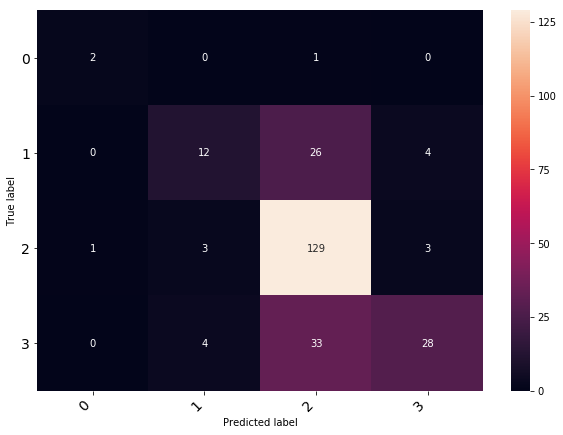

In [145]:
cmatrix = metrics.confusion_matrix(y_test, predicted_test)
print("Confusion matrix:\n%s" % cmatrix)
print_confusion_matrix(cmatrix, class_names=[i for i in range(4)])
plt.show()

In [146]:
X_to_predict=google_work_to_predict[['Rating','Reviews','Installs_numerical','Free']]
Y_to_predict=clf.predict(X_to_predict)

In [148]:
Y_final=[]
for item in Y_to_predict:
    if item==0:
        Y_final.append('X<=0.25')
    if item==1:
        Y_final.append('0.25<X<=0.5')
    if item==2:
        Y_final.append('0.5<X<=0.75')
    if item==3:
        Y_final.append('X>0.75')

In [152]:
google_work_FINAL=google_work_to_predict[[item for item in google_work_to_predict.columns if item!='Positive Ratio cat']]
google_work_FINAL['Predicted Possitive Ratio']=Y_final
display(google_work_FINAL.head())

/home/ivan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,App,Category,Rating,Reviews,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_numerical,Installs_numerical,Free,Predicted Possitive Ratio
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0.0,10000,1,0.5<X<=0.75
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0.0,5000000,1,0.5<X<=0.75
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,0.0,50000000,1,0.5<X<=0.75
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0.0,100000,1,0.5<X<=0.75
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,Free,Everyone,Art & Design,2017-03-26,1.0,2.3 and up,0.0,50000,1,0.5<X<=0.75


___